In [53]:
import numpy as np
import seaborn as sns
import pandas as pd
import math

# Math
## variable terms
|variable | description |
|---------| ----------- |
| time | time for diffusion to occur in (mins), written as (minimum time : maximum time) |
| CAS | starting concentration at surface in(μM)|
|gel | gel thickness in(μm)temp= temperature in(◦C)|
|dyvisc |dynamic viscoscity of buffer/media in(kg/m·s)or(Pa·s)|
|rad |radius of solute in(nm)|
|dpore | diameter of gel pore in(nm)|

## constant terms
|variable | description |
|---------| ----------- |
|Boltz| bolltzmann Constant (1.38064852 x10−23)|
|k_to_c |Conversion from(◦C)to Kelvin (273.15)|

## Terms in Function:

* (Boltz* (temp+273.15)/(6* pi* dyvisc* rad))* 60e+21= Stokes einstein equation/diffusion coefficient(μm2/s)
* (1 -ψ)2= Steric partition coefficient(F1(ψ))
* 1 - (2.104 *ψ) + (2.09 *ψ3) - (0.95 *ψ5)= Hydrodynamic hinderance factor(F2(ψ))
* rad * 2/dpore=ψCAS·1 - erf(x√4·2D·t)= solution to Fick’s second law (∂C∂t= 2D·∂2C∂x2) for * two-sided diffusion boundary conditions (x=0,c=CAS; x>0, c = 0; t=0)



In [45]:
# constants
boltz = 1.38064852e-23
dyvisc = 0.001569# this can be variable, but it is constant for now
dpore = 56
pi = np.pi
def k_to_c(temp):
    val = temp + 273.15
    return val

In [46]:
k_to_c(4)

277.15

In [98]:
def twosidedDiffusion(time, cas, gel, temp, rad):
    tempK = k_to_c(temp)
    stokes = boltz* tempK/(6* pi* dyvisc* rad)* 60e+21
    psi = (rad*2)/dpore
    steric_partition = np.power(1-psi, 2)
    hindrance = 1 - (2.104 * psi) + np.power(2.09*psi,3) - np.power(0.95*psi, 5)
    D = stokes*steric_partition*hindrance
    _denom = np.sqrt(4*2*D*time)
    
    c_as = 1-math.erf(gel/_denom)
    c_as_time = cas * c_as
    return np.int(c_as_time)

[Text(0.5, 0, 'time (minutes)'), Text(0, 0.5, 'uM concentration')]

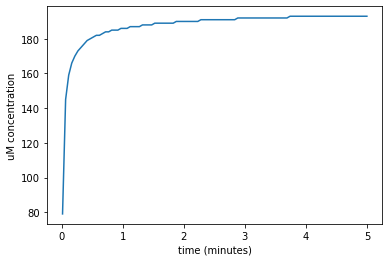

In [108]:
x = np.linspace(.01,5,100)
vectorizedDiffusion = np.vectorize(twosidedDiffusion) 
y = vectorizedDiffusion(x, 200, 25, 4 ,.34)
ax = sns.lineplot(x=x, y = y)
ax.set(xlabel='time (minutes)', ylabel='uM concentration')